# Прикладная статистика. ДЗ 2.
# Академия Аналитиков Авито

__Правила:__
- Бонусные баллы даются за задачи, правильно решенные до **2021-10-31 23:59**. 
- Финальный дедлайн: **2021-11-07 23:59**. 
- После того как ваше решение проверят и ответят, дается неделя на исправление решения (если есть что исправлять). Ответ и обсуждение решения — в телеграме.

- Выполненную работу нужно отправить в чатик HW2-<ваше имя> через бота @AAA_stats22_bot или в личные сообщения боту.
- В качестве решения нужно отправить файл ipynb. Ссылка на интернет-ресурсы не принимается. Не публикуйте решения в открытом доступе!
- Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. **При этом можно добавлять новые ячейки!**
- в ячейках с комментарием `#Автопроверка` нужно заполнить содержимое функций и классов (если есть), которые будут уже объявлены в этой ячейке. При этом:
    - Нельзя убирать или переставять `#Автопроверка` в ячейке. 
    - Нельзя менять сигнатуру и возвращаемое значение функций. То есть добавлять любой код можно, но удалять, что уже написано - нельзя.
    - Нельзя ничего импортировать в таких ячейках. Все доступные для использования библиотеки будут указаны заранее. Такие слова, как `import`, `globals`, `locals`, `eval`, `exec` также нельзя использовать внутри ячеек.
    - Нельзя использовать библиотеки, кроме тех, что указаны в задании. Ваш код должен работать именно с эти набором библиотек без любого дополнительного импорта!
    - Нельзя использовать код из других ячеек ноутбука (кроме ячейки с импортом, в которой указаны все доступные библиотеки). Единственное исключение - если вы проставите в начало такой ячейки слово `#Автопроверка`. Тогда вы можете использовать код из этой ячейки.
    - В случае нарушения этого правила автопроверка будет провалена и вы не получите часть баллов за задачу. 
    - В случае, если есть несколько ячеек автопроверки, то в каждой такой ячейке можно использовать созданные вами функции (или классы) из других ячеек автопроверки.

## Задача 1 (1 балл)

Пусть $x_1, ... x_N$ — реализация выборки $\xi_1, ... \xi_N \sim \mathcal{N}(\mu,\sigma)$. Мы хотим проверить гипотезу:
- $H_0: \mu = \mu_0$
- $H_1: \mu \neq \mu_0$

Реализовать критерий Стьюдента — функцию `simple_my_t_test(sample, mu_0, alpha)`. Функция должна вернуть `SimpleMyTtestResults` с полями
- is_rejected: отверглась или нет гипотеза H_0 на уровне значимости alpha
- pvalue

Какие библиотеки можно использовать:

```
import numpy as np
from collections import namedtuple
import math
from scipy.stats import t
```

In [235]:
import numpy as np
from collections import namedtuple
import math
from scipy.stats import t

**Важно:** что ее решение надо объяснить! Можно не вдаваться в детали, но ваш алгоритм надо описать текстом.

In [236]:
# Автопроверка

MySimpleTtestResults = namedtuple('MySimpleTtestResults', 
                                  ['is_rejected', 'pvalue'])

def my_simple_t_test(sample: list, mu_0: float, alpha: float = 0.05):
    """
    Параметры:
    - sample: текущая реализация выборки
    - mu_0: мат. ожидание выборки при H_0
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - MyTtestResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 на уровне значимости alpha
        - pvalue: float
    """
    is_rejected = None
    pvalue = None
    crit_val = t.ppf(1-alpha/2,len(sample)-1)
    aver = np.mean(sample)
    t_test = (aver - mu_0) * (len(sample))**0.5 / np.std(sample, ddof =1)
    
    if abs(t_test) > crit_val:
        is_rejected = True
    else:
        is_rejected = False

    pvalue = 2*min(1 - t.cdf(t_test, len(sample)-1, loc=0, scale=1),t.cdf(t_test, len(sample)-1, loc=0, scale=1))

    return MySimpleTtestResults(is_rejected, pvalue)


## Пояснения
Так как здесь альтернатвиная гипотеза $H_1: \mu \neq \mu_0$, то необходимо использовать двусторонний критерий t-Стьюдента. Таким образом, критические значения с которыми будем сравнивать результат t-test'а должны быть найдены для $\frac{\alpha}{2}$. 
При этом, сами критические значения для уровня значимости $\frac{\alpha}{2}$ могут быть найдены через функцию ppf для t распределения со степенями свободы = длине выборки - 1. При этом, в силу симметрии распределения, правое и левое критические значения будут равны по модулю, а значит можно посчитать только правое значение и сравнивать его с модулем t статистики. При этом если статистика больше по модулю, чем критическое значение, нулевая гипотеза отвергается.
Саму t статистику можно найти по формуле: 

$t 
= \frac{\bar x - \mu_0}{\frac{\hat\sigma}{\sqrt n}}$

$\hat{\sigma} = \sqrt{\frac{\sum_{i=1}^{n}\left(x_i - \bar x\right)^2}{n-1}}$

Затем необходимо посчитать p-value - это удвоенная вероятность (из-за двухстороннего предположения, удвоенная - в силу симметрии) получить значение суммы t или больше из n случаев или t или меньше из n. Формально представляется как $2*min(1-F(t);F(t))$



## Задача 2 (3 балла)

Решить прошлую задачу без использования распределения Стьюдента,
**пользуясь следующими библиотеками**

```
from numpy import mean
from numpy import std
from numpy import percentile
from numpy.random import seed
from numpy.random import rand
from numpy import pi
from numpy import log
from numpy import sin
from numpy import cos
``` 

In [237]:
from numpy import mean
from numpy import std
from numpy import percentile
from numpy.random import seed
from numpy.random import rand # равномерное распределение на [0,1)
from numpy import pi
from numpy import log 
from numpy import sin
from numpy import cos

In [238]:
MyTtestResults = namedtuple('MyTtestResults', ['is_rejected', 'pvalue'])

def my_t_test(sample: list, mu_0: float, alpha: float = 0.05):
    """
    Параметры:
    - sample: текущая реализация выборки
    - mu_0: мат. ожидание выборки при H_0
    - alpha: уровень значимости критерия.
        
    Возвращает:
    - MyTtestResults с полями:
        - is_rejected: bool
            - отверглась или нет гипотеза H_0 на уровне значимости alpha
    """
    seed(12345)
    uniform = [rand(1000) for i in range(1000)] # Генерим большое равномерное
    stand_normal = [(mean(samp)-0.5)*(12*len(uniform))**0.5 for samp in uniform] # По ЦПТ прихоидим к нормальному
    chi_sq = [chi**2 for chi in stand_normal]
    aver = (mean(chi_sq))**0.5
    t_stud = [chi/aver for chi in stand_normal]# Превращаем нормальное в Стьюдента

    t_crit = percentile(sorted(t_stud.copy()),100*(1-(alpha/2)))
    t_stat = (mean(sample) - mu_0) * (len(sample)**0.5)/ std(sample, ddof = 1)


    if abs(t_stat) > abs(t_crit):
        is_rejected = True
    else:
        is_rejected = False

    p_num = 0
    for i in t_stud:
        if abs(i) > t_stat:
            p_num += 1
    pvalue = p_num/len(t_stud)
    return MyTtestResults(is_rejected, pvalue)

## Решение
Данное решение основывается на одном из величайших открытий человечества - Центральной предельной теореме. По ЦПТ знаем: $\frac{\frac{1}{n}\sum\xi_i-E}{\frac{\sigma}{\sqrt{n}}}\rightarrow N(0,1)$. А так как разрешена только функция rand, то $\xi_i\sim U(0,1)$, и значит $E\xi = 0.5, D\xi = \frac{1}{12} = \sigma^2$.Тогда для достаточности размеров нагенерируем 1000 выборок по 1000 элементов (одна выборка из равномерного превращается в один элемент нормального), таким образом получаем выборку из нормального распределения $N(0,1)$ с тысячью элементами. Далее необходимо перейти к распределению Стьюдента, для этого воспользуемся связью t-распределения с нормальным: $t = \frac{X_0}{\sum{X_i^2}}$, где ${X_i}$ - независимые стандартные нормальные случайные величины из $N(0,1)$. Таким образом у нас появилась выборка из распределения Стьюдента на 1000 элементов, что довольно близко к теоретическим показателями при $n\rightarrow \infty$ 

Теперь с помощью функции percentile определяем критическое значение, так как двусторонний критерий, то берем значение для $1-\frac{\alpha}{2}$ для одностороннего критерия у отсортированного списка из распределения Стьюдента. Далее идем аналогично решению Задачи 1.

- Для получения полного балла, p-value вашего критерия не должно отличаться от p-value `scipy.stats.ttest_1samp` больше, чем на 10^-3.
- Если ваш код для одного теста работает больше минуты - он не засчитывается.

## Задача 3 (6 баллов)

**1. (2 балла)**

Написать код для проверки критерия при корректности $H_0$:

- Зафиксировать $\mu = 0,\ \mu_0 = 0$ ($H_0$ справедлива)
- Зафиксировать $n, \sigma, \alpha$ на ваше усмотрение
- 10000 раз повторить:
    
    –сгенереровать выборку $x_1,..., x_n$ из $\mathcal{N}(\mu, \sigma)$
    
    –вызвать для нее `my_simple_t_test(sample, mu_0, alpha)`
    
    –на основании выдачи функции принять или не принять $H_1$
- замерить долю ошибок первого рода (False Positive Rate)
- Проверить, стат значимо или нет на уровне 5% отличается полученный процент ошибок от теоретического $\alpha$.


**2. (1 балл)**

Провести эксперимент 1 с разными параметрами $n, \sigma, \alpha$.
Оформить отчет о результатах c графиками, комментариями и выводами.

--- 
**3. (1 балл)**

Написать код для проверки критерия при корректности $H_1$:

- Зафиксировать $\mu \neq 0,\ \mu_0 = 0$ ($H_1$ справедлива)
- Зафиксировать $n, \sigma, \alpha$ на ваше усмотрение
- 10000 раз повторить:
    
    –сгенереровать выборку $x_1,..., x_n$ из $\mathcal{N}(\mu, \sigma)$
    
    –вызвать для нее `my_simple_t_test(sample, mu_0, alpha)`
    
    –на основании выдачи функции принять или не принять $H_1$
- замерить долю ошибок второго рода (False Negative Rate)
- Построить доверительный интервал для мощности критерия при заданном $\mu$.

**2. (2 балла)**

Провести предыдущий эксперимент с разными параметрами $\mu, n, \sigma, \alpha$.
Оформить отчет о результатах c графиками, комментариями и выводами.

## 3.1

In [239]:
from statsmodels.stats.proportion import proportion_confint
from matplotlib import pyplot

In [240]:

n = 1000
sigma = 1.0
alpha = 0.05
mu_0 = 0
oops = 0
mu = 0
for i in range(10000):
    sample = np.random.normal(loc=mu, scale= sigma, size= n)
    if my_simple_t_test(sample, mu_0, alpha)[0] is True:
        oops += 1
fpr = oops/10000     

l, r = proportion_confint(count=oops, nobs= 10000, alpha=0.05, method='wilson')

print(f'FPR is {fpr} ± {(r - l) / 2:.3f}')
print(f'FPR cтатзначимо {fpr<= 0.05 + (r - l) / 2 + fpr>= 0.05 - (r - l) / 2}') 

FPR is 0.0491 ± 0.004
FPR cтатзначимо True


## 3.2

In [241]:
#Cоставим табличку с разными параметрами, где для каждой ячейки смотрим как при увеличении числа выборки 
#и изменении одного из параметров меняется ошибка. Начальный бандл (𝜇=1,𝑛-меняем,𝜎=2,𝛼=0.05)
ns = [(1, 20, 2, 0.1),(1, 50, 2, 0.1), (1, 100, 2, 0.1), (1, 1000, 2, 0.1), (1, 10000, 2, 0.1), #Здесь альфа = 0.1 при прочих равных
      (1, 20, 2, 0.05),(1, 50, 2, 0.05), (1, 100, 2, 0.05), (1, 1000, 2, 0.05), (1, 10000, 2, 0.05),# Здесь альфа = 0.05 при прочих равных 
      (1, 20, 2, 0.01),(1, 50, 2, 0.01), (1, 100, 2, 0.01), (1, 1000, 2, 0.01), (1, 10000, 2, 0.01),#Здесь альфа = 0.01 при прочих равных
      (2, 20, 2, 0.05),(2, 50, 2, 0.05), (2, 100, 2, 0.05), (2, 1000, 2, 0.05), (2, 10000, 2, 0.05),#Увеличили мат. ожидание
      (1, 20, 3, 0.05),(1, 50, 3, 0.05), (1, 100, 3, 0.05), (1, 1000, 3, 0.05), (1, 10000, 3, 0.05), #Увеличили СКО
     ]
fprs,fprs_vis = [],[]

for N in ns:#Проходимся и в цикле меняем параметры
    np.random.seed(228)
    oops = 0
    mu = N[0]
    sigma = N[2]
    n = N[1]
    alpha = N[3]
    for i in range(10000):
        sample = np.random.normal(loc=mu, scale= sigma, size= n)
        if my_simple_t_test(sample, mu, alpha)[0] is True:
            oops += 1
    fpr = oops/10000 #Рассчитываем FPR
    l, r = proportion_confint(count=oops, nobs= 10000, alpha=0.05, method='wilson')
    fprs.append((N[0], N[1], N[2], N[3], fpr))
    fprs_vis.append((f'𝜇 = {N[0]},𝑛 = {N[1]},𝜎 = {N[2]},𝛼 = {N[3]}' , f'FPR is {fpr} ± {(r - l) / 2:.3f}'))
fprs_vis

[('𝜇 = 1,𝑛 = 20,𝜎 = 2,𝛼 = 0.1', 'FPR is 0.0973 ± 0.006'),
 ('𝜇 = 1,𝑛 = 50,𝜎 = 2,𝛼 = 0.1', 'FPR is 0.0986 ± 0.006'),
 ('𝜇 = 1,𝑛 = 100,𝜎 = 2,𝛼 = 0.1', 'FPR is 0.1023 ± 0.006'),
 ('𝜇 = 1,𝑛 = 1000,𝜎 = 2,𝛼 = 0.1', 'FPR is 0.1007 ± 0.006'),
 ('𝜇 = 1,𝑛 = 10000,𝜎 = 2,𝛼 = 0.1', 'FPR is 0.095 ± 0.006'),
 ('𝜇 = 1,𝑛 = 20,𝜎 = 2,𝛼 = 0.05', 'FPR is 0.0441 ± 0.004'),
 ('𝜇 = 1,𝑛 = 50,𝜎 = 2,𝛼 = 0.05', 'FPR is 0.0484 ± 0.004'),
 ('𝜇 = 1,𝑛 = 100,𝜎 = 2,𝛼 = 0.05', 'FPR is 0.0515 ± 0.004'),
 ('𝜇 = 1,𝑛 = 1000,𝜎 = 2,𝛼 = 0.05', 'FPR is 0.0537 ± 0.004'),
 ('𝜇 = 1,𝑛 = 10000,𝜎 = 2,𝛼 = 0.05', 'FPR is 0.0459 ± 0.004'),
 ('𝜇 = 1,𝑛 = 20,𝜎 = 2,𝛼 = 0.01', 'FPR is 0.0084 ± 0.002'),
 ('𝜇 = 1,𝑛 = 50,𝜎 = 2,𝛼 = 0.01', 'FPR is 0.0093 ± 0.002'),
 ('𝜇 = 1,𝑛 = 100,𝜎 = 2,𝛼 = 0.01', 'FPR is 0.0102 ± 0.002'),
 ('𝜇 = 1,𝑛 = 1000,𝜎 = 2,𝛼 = 0.01', 'FPR is 0.0105 ± 0.002'),
 ('𝜇 = 1,𝑛 = 10000,𝜎 = 2,𝛼 = 0.01', 'FPR is 0.0093 ± 0.002'),
 ('𝜇 = 2,𝑛 = 20,𝜎 = 2,𝛼 = 0.05', 'FPR is 0.0441 ± 0.004'),
 ('𝜇 = 2,𝑛 = 50,𝜎 = 2,𝛼 = 0.05', 'FPR is 0.0

## Графики:
Смотрим, как меняется FPR в зависимости от уровня альфа и увеличения выборки.

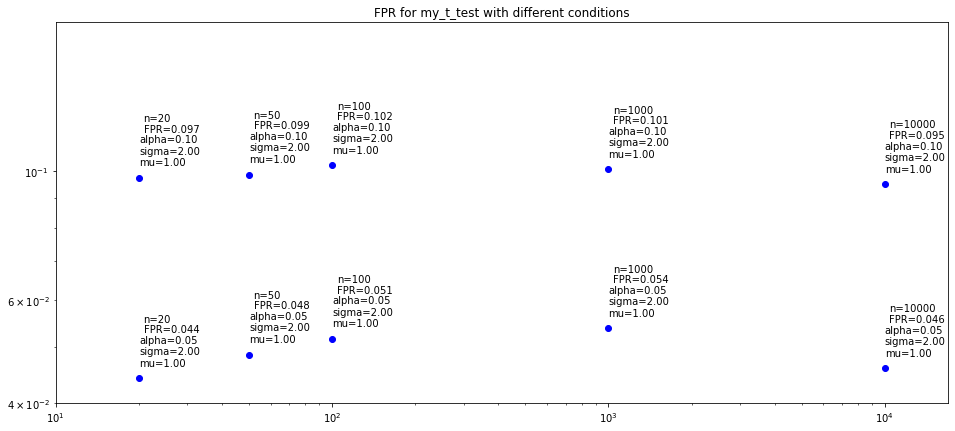

In [242]:
pyplot.figure(figsize=(16, 7))
pyplot.plot([fprs[i][1] for i in range(10)],[fprs[i][-1] for i in range(10)], 'bo', linewidth=1.0)
pyplot.yscale('log')
pyplot.xscale('log')

for i in range(10):
    pyplot.annotate(f'n={fprs[i][1]}', (fprs[i][1] * 1.04, fprs[i][-1] * 1.25))
    pyplot.annotate(f'FPR={fprs[i][-1]:.3f}', (fprs[i][1] * 1.04, fprs[i][-1] * 1.2))
    pyplot.annotate(f'alpha={fprs[i][-2]:.2f}', (fprs[i][1] * 1.001, fprs[i][-1] * 1.15))
    pyplot.annotate(f'sigma={fprs[i][2]:.2f}', (fprs[i][1] * 1.001, fprs[i][-1] * 1.1))
    pyplot.annotate(f'mu={fprs[i][0]:.2f}', (fprs[i][1] * 1.001, fprs[i][-1] * 1.05))


pyplot.xlim(left=10, right=17000)
pyplot.ylim(bottom=0.04, top=0.18)
pyplot.title('FPR for my_t_test with different conditions')
pyplot.show()

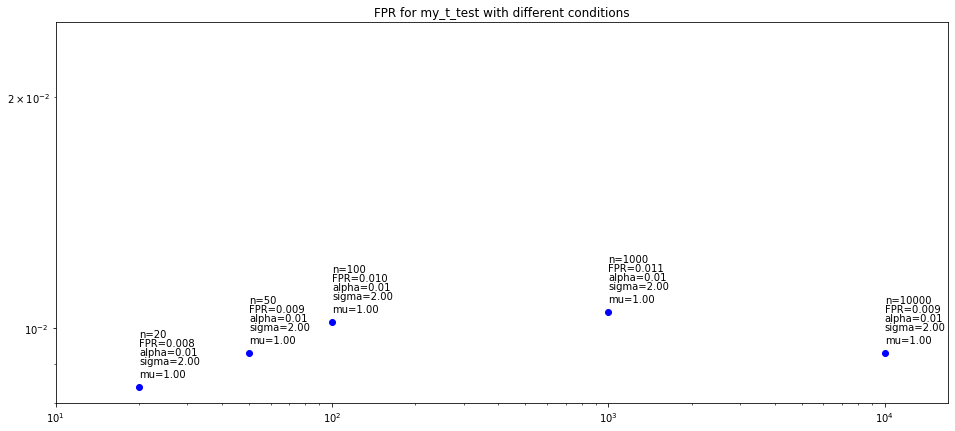

In [243]:
pyplot.figure(figsize=(16, 7))
pyplot.plot([fprs[i+10][1] for i in range(5)],[fprs[i+10][-1] for i in range(5)], 'bo', linewidth=1.0)
pyplot.yscale('log')
pyplot.xscale('log')

for i in range(5):
        pyplot.annotate(f'n={fprs[i+10][1]}', (fprs[i+10][1] * 1.001, fprs[i+10][-1] * 1.16))
        pyplot.annotate(f'FPR={fprs[i+10][-1]:.3f}', (fprs[i+10][1] * 1.001, fprs[i+10][-1] * 1.13))
        pyplot.annotate(f'alpha={fprs[i+10][-2]:.2f}', (fprs[i+10][1] * 1.001, fprs[i+10][-1] * 1.1))
        pyplot.annotate(f'sigma={fprs[i+10][2]:.2f}', (fprs[i+10][1] * 1.001, fprs[i+10][-1] * 1.07))
        pyplot.annotate(f'mu={fprs[i+10][0]:.2f}', (fprs[i+10][1] * 1.001, fprs[i+10][-1] * 1.03))

pyplot.xlim(left=10, right=17000)
pyplot.ylim(bottom=0.008, top=0.025)
pyplot.title('FPR for my_t_test with different conditions')
pyplot.show()

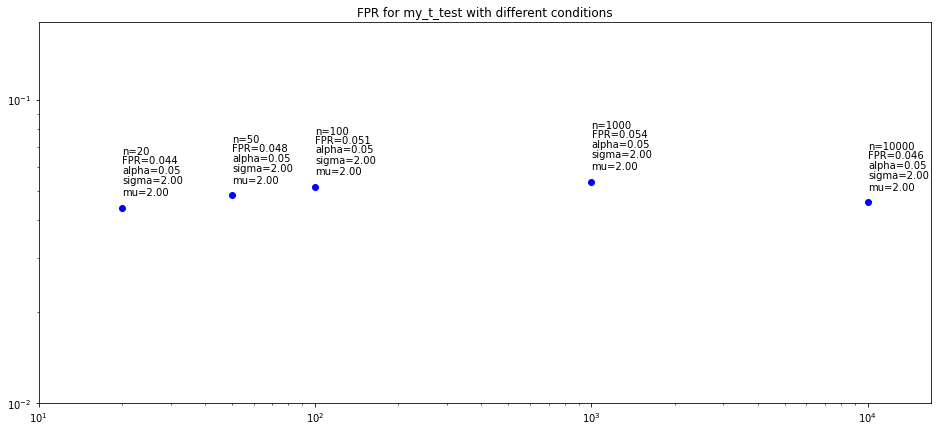

In [244]:
pyplot.figure(figsize=(16, 7))
pyplot.plot([fprs[i+15][1] for i in range(5)],[fprs[i+15][-1] for i in range(5)], 'bo', linewidth=1.0)
pyplot.yscale('log')
pyplot.xscale('log')

for i in range(5):
    pyplot.annotate(f'n={fprs[i+15][1]}', (fprs[i+15][1] * 1.001, fprs[i+15][-1] * 1.5))
    pyplot.annotate(f'FPR={fprs[i+15][-1]:.3f}', (fprs[i+15][1] * 1.001, fprs[i+15][-1] * 1.4))
    pyplot.annotate(f'alpha={fprs[i+15][-2]:.2f}', (fprs[i+15][1] * 1.001, fprs[i+15][-1] * 1.3))
    pyplot.annotate(f'sigma={fprs[i+15][2]:.2f}', (fprs[i+15][1] * 1.001, fprs[i+15][-1] * 1.2))
    pyplot.annotate(f'mu={fprs[i+15][0]:.2f}', (fprs[i+15][1] * 1.001, fprs[i+15][-1] * 1.1))

pyplot.xlim(left=10, right=17000)
pyplot.ylim(bottom=0.01, top=0.18)
pyplot.title('FPR for my_t_test with different conditions')
pyplot.show()

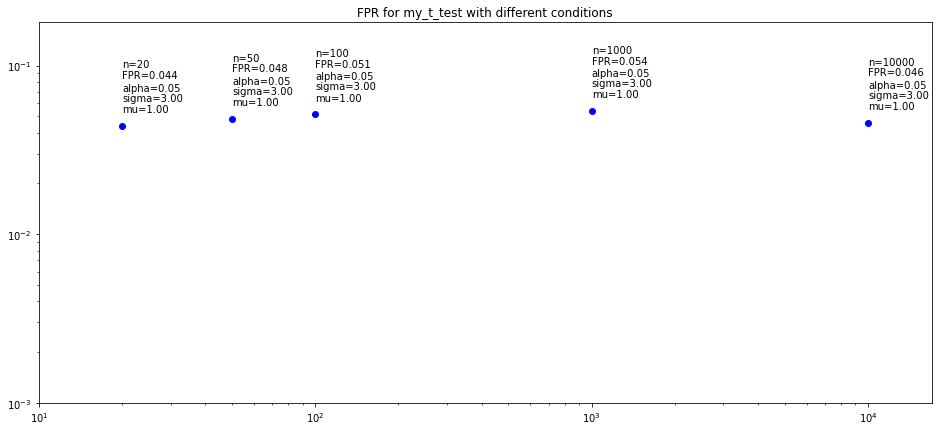

In [245]:
pyplot.figure(figsize=(16, 7))
pyplot.plot([fprs[i+20][1] for i in range(5)],[fprs[i+20][-1] for i in range(5)], 'bo', linewidth=1.0)
pyplot.yscale('log')
pyplot.xscale('log')

for i in range(5):
    pyplot.annotate(f'n={fprs[i+20][1]}', (fprs[i+20][1] * 1.001, fprs[i+20][-1] * 2.2))
    pyplot.annotate(f'FPR={fprs[i+20][-1]:.3f}', (fprs[i+20][1] * 1.001, fprs[i+20][-1] * 1.9))
    pyplot.annotate(f'alpha={fprs[i+20][-2]:.2f}', (fprs[i+20][1] * 1.001, fprs[i+20][-1] * 1.6))
    pyplot.annotate(f'sigma={fprs[i+20][2]:.2f}', (fprs[i+20][1] * 1.001, fprs[i+20][-1] * 1.4))
    pyplot.annotate(f'mu={fprs[i+20][0]:.2f}', (fprs[i+20][1] * 1.001, fprs[i+20][-1] * 1.2))
    

pyplot.xlim(left=10, right=17000)
pyplot.ylim(bottom=0.001, top=0.18)
pyplot.title('FPR for my_t_test with different conditions')
pyplot.show()

## Выводы
Согласно проведенным расчетам, при больших размерах выборки уменьшается ширина доверительного интервала, а ошибка первого рода меньше отклоняется от теоретического значения. Среднеквадратическое отклонение не оказало существенных изменений на FPR. Ну и (удивительно) FPR строго коррелирует с выбранным уровнем альфа. 


## 3.3

In [246]:
n = 1000
sigma = 1.0
alpha = 0.05
mu_0 = 1
mu = 0.5
oops_2 = 0
for i in range(10000):
    sample = np.random.normal(loc=mu, scale= sigma, size= n)
    if my_simple_t_test(sample, mu_0, alpha)[0] is False:
        oops_2 += 1
fnr = oops_2/10000     
l_2, r_2 = proportion_confint(count=oops_2, nobs= 10000, alpha=0.05, method='wilson')

print(f'FNR is {fnr} ± {(r - l) / 2:.3f}')

FNR is 0.0 ± 0.004


## 3.4


In [247]:
# Все абсолютно аналогично с FPR
ns = [(1, 20, 2, 0.1),(1, 50, 2, 0.1), (1, 100, 2, 0.1), (1, 1000, 2, 0.1), (1, 10000, 2, 0.1),
      (1, 20, 2, 0.05),(1, 50, 2, 0.05), (1, 100, 2, 0.05), (1, 1000, 2, 0.05), (1, 10000, 2, 0.05),
      (1, 20, 2, 0.01),(1, 50, 2, 0.01), (1, 100, 2, 0.01), (1, 1000, 2, 0.01), (1, 10000, 2, 0.01),
      (2, 20, 2, 0.05),(2, 50, 2, 0.05), (2, 100, 2, 0.05), (2, 1000, 2, 0.05), (2, 10000, 2, 0.05),
      (1, 20, 3, 0.05),(1, 50, 3, 0.05), (1, 100, 3, 0.05), (1, 1000, 3, 0.05), (1, 10000, 3, 0.05),   
     ]
fpns_vis, fpns = [], []

for N in ns:
    np.random.seed(228)
    oops_2 = 0
    mu = N[0]
    sigma = N[2]
    n = N[1]
    alpha = N[3]
    mu_0 = 0
    for i in range(10000):
        sample = np.random.normal(loc=mu, scale= sigma, size= n)
        if my_simple_t_test(sample, mu_0, alpha)[0] is False:
            oops_2 += 1
    fnr = oops_2/10000
    l, r = proportion_confint(count=oops_2, nobs= 10000, alpha=0.05, method='wilson')
    fpns.append((N[0], N[1], N[2], N[3], fnr))
    fpns_vis.append((f'𝜇 = {N[0]},𝑛 = {N[1]},𝜎 = {N[2]},𝛼 = {N[3]}' , f'FNR is {fnr} ± {(r - l) / 2:.3f}'))
fpns_vis

[('𝜇 = 1,𝑛 = 20,𝜎 = 2,𝛼 = 0.1', 'FNR is 0.3026 ± 0.009'),
 ('𝜇 = 1,𝑛 = 50,𝜎 = 2,𝛼 = 0.1', 'FNR is 0.0335 ± 0.004'),
 ('𝜇 = 1,𝑛 = 100,𝜎 = 2,𝛼 = 0.1', 'FNR is 0.0006 ± 0.001'),
 ('𝜇 = 1,𝑛 = 1000,𝜎 = 2,𝛼 = 0.1', 'FNR is 0.0 ± 0.000'),
 ('𝜇 = 1,𝑛 = 10000,𝜎 = 2,𝛼 = 0.1', 'FNR is 0.0 ± 0.000'),
 ('𝜇 = 1,𝑛 = 20,𝜎 = 2,𝛼 = 0.05', 'FNR is 0.432 ± 0.010'),
 ('𝜇 = 1,𝑛 = 50,𝜎 = 2,𝛼 = 0.05', 'FNR is 0.0655 ± 0.005'),
 ('𝜇 = 1,𝑛 = 100,𝜎 = 2,𝛼 = 0.05', 'FNR is 0.0011 ± 0.001'),
 ('𝜇 = 1,𝑛 = 1000,𝜎 = 2,𝛼 = 0.05', 'FNR is 0.0 ± 0.000'),
 ('𝜇 = 1,𝑛 = 10000,𝜎 = 2,𝛼 = 0.05', 'FNR is 0.0 ± 0.000'),
 ('𝜇 = 1,𝑛 = 20,𝜎 = 2,𝛼 = 0.01', 'FNR is 0.7067 ± 0.009'),
 ('𝜇 = 1,𝑛 = 50,𝜎 = 2,𝛼 = 0.01', 'FNR is 0.1964 ± 0.008'),
 ('𝜇 = 1,𝑛 = 100,𝜎 = 2,𝛼 = 0.01', 'FNR is 0.0091 ± 0.002'),
 ('𝜇 = 1,𝑛 = 1000,𝜎 = 2,𝛼 = 0.01', 'FNR is 0.0 ± 0.000'),
 ('𝜇 = 1,𝑛 = 10000,𝜎 = 2,𝛼 = 0.01', 'FNR is 0.0 ± 0.000'),
 ('𝜇 = 2,𝑛 = 20,𝜎 = 2,𝛼 = 0.05', 'FNR is 0.0097 ± 0.002'),
 ('𝜇 = 2,𝑛 = 50,𝜎 = 2,𝛼 = 0.05', 'FNR is 0.0 ± 0.000'),
 ('𝜇 =

## Графики


('𝜇 = 1,𝑛 = 1000,𝜎 = 2,𝛼 = 0.1', 'FNR is 0.0 ± 0.000')
('𝜇 = 1,𝑛 = 10000,𝜎 = 2,𝛼 = 0.1', 'FNR is 0.0 ± 0.000')
('𝜇 = 1,𝑛 = 1000,𝜎 = 2,𝛼 = 0.05', 'FNR is 0.0 ± 0.000')
('𝜇 = 1,𝑛 = 10000,𝜎 = 2,𝛼 = 0.05', 'FNR is 0.0 ± 0.000')
('𝜇 = 1,𝑛 = 1000,𝜎 = 2,𝛼 = 0.01', 'FNR is 0.0 ± 0.000')
('𝜇 = 1,𝑛 = 10000,𝜎 = 2,𝛼 = 0.01', 'FNR is 0.0 ± 0.000')


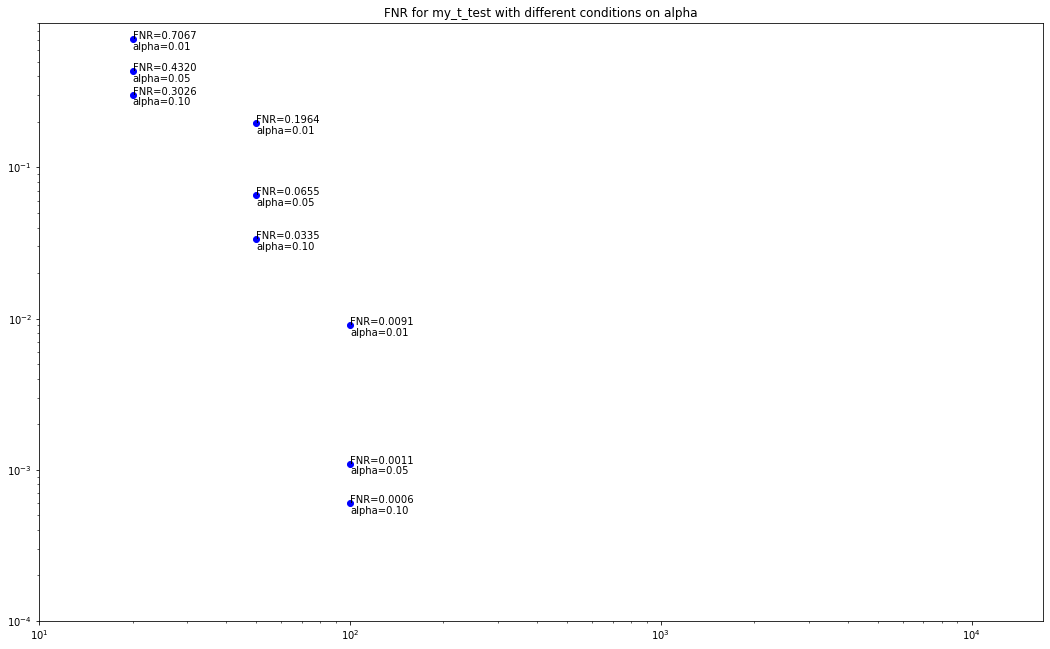

In [248]:
pyplot.figure(figsize=(18, 11))
pyplot.plot([fpns[i][1] for i in range(15)],[fpns[i][-1] for i in range(15)], 'bo', linewidth=1.0)
pyplot.yscale('log')
pyplot.xscale('log')

for i in range(15):
    if fpns[i][-1] > 0:
        pyplot.annotate(f'FNR={fpns[i][-1]:.4f}', (fpns[i][1]*1.001 , fpns[i][-1]*1))
        pyplot.annotate(f'alpha={fpns[i][-2]:.2f}', (fpns[i][1]*1.001, fpns[i][-1]*0.85))
    else:
        print(fpns_vis[i])

pyplot.xlim(left=10, right=17000)
pyplot.ylim(bottom=0.0001, top=0.9)
pyplot.title('FNR for my_t_test with different conditions on alpha')
pyplot.show() 

('𝜇 = 2,𝑛 = 50,𝜎 = 2,𝛼 = 0.05', 'FNR is 0.0 ± 0.000')
('𝜇 = 2,𝑛 = 100,𝜎 = 2,𝛼 = 0.05', 'FNR is 0.0 ± 0.000')
('𝜇 = 2,𝑛 = 1000,𝜎 = 2,𝛼 = 0.05', 'FNR is 0.0 ± 0.000')
('𝜇 = 2,𝑛 = 10000,𝜎 = 2,𝛼 = 0.05', 'FNR is 0.0 ± 0.000')


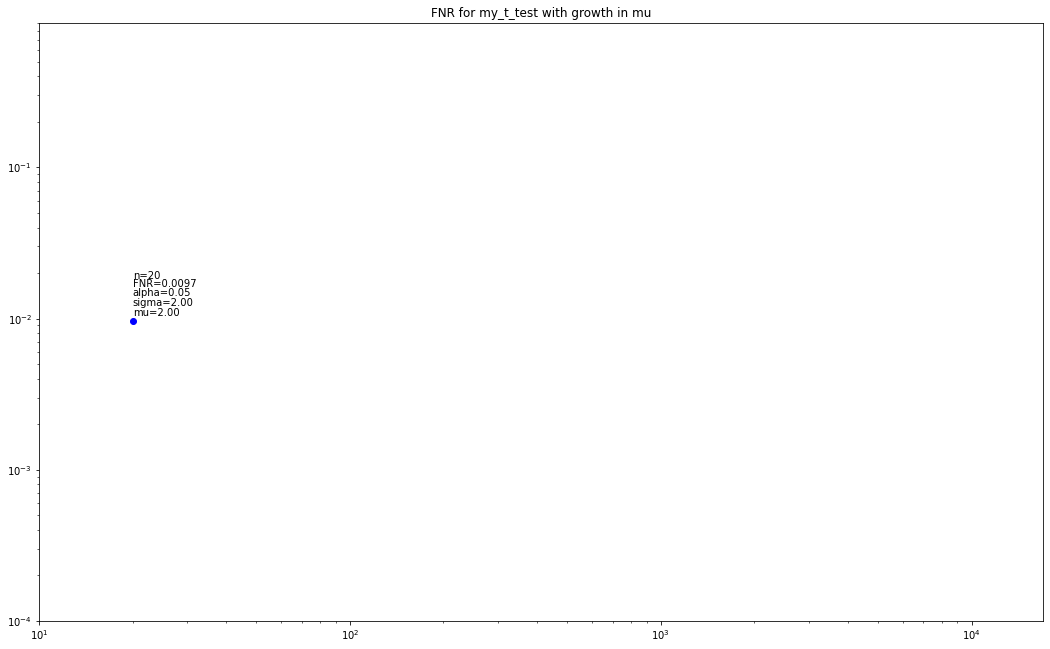

In [249]:
pyplot.figure(figsize=(18, 11))
pyplot.plot([fpns[i+15][1] for i in range(5)],[fpns[i+15][-1] for i in range(5)], 'bo', linewidth=1.0)
pyplot.yscale('log')
pyplot.xscale('log')

for i in range(5):
    if fpns[15+i][-1] > 0:
        pyplot.annotate(f'n={fpns[i+15][1]}',(fpns[i+15][1]*1.001, fpns[i+15][-1]*1.9))
        pyplot.annotate(f'FNR={fpns[i+15][-1]:.4f}', (fpns[i+15][1]*1.001 , fpns[i+15][-1]*1.68))
        pyplot.annotate(f'alpha={fpns[i+15][-2]:.2f}', (fpns[i+15][1]*1.001, fpns[i+15][-1]*1.45))
        pyplot.annotate(f'sigma={fpns[i+15][2]:.2f}', (fpns[i+15][1]*1.001, fpns[i+15][-1]*1.25))
        pyplot.annotate(f'mu={fpns[i+15][0]:.2f}', (fpns[i+15][1]*1.001, fpns[i+15][-1]*1.07))
    else:
        print(fpns_vis[15+i])
    
pyplot.xlim(left=10, right=17000)
pyplot.ylim(bottom=0.0001, top=0.9)
pyplot.title('FNR for my_t_test with growth in mu')
pyplot.show()

('𝜇 = 1,𝑛 = 1000,𝜎 = 3,𝛼 = 0.05', 'FNR is 0.0 ± 0.000')
('𝜇 = 1,𝑛 = 10000,𝜎 = 3,𝛼 = 0.05', 'FNR is 0.0 ± 0.000')


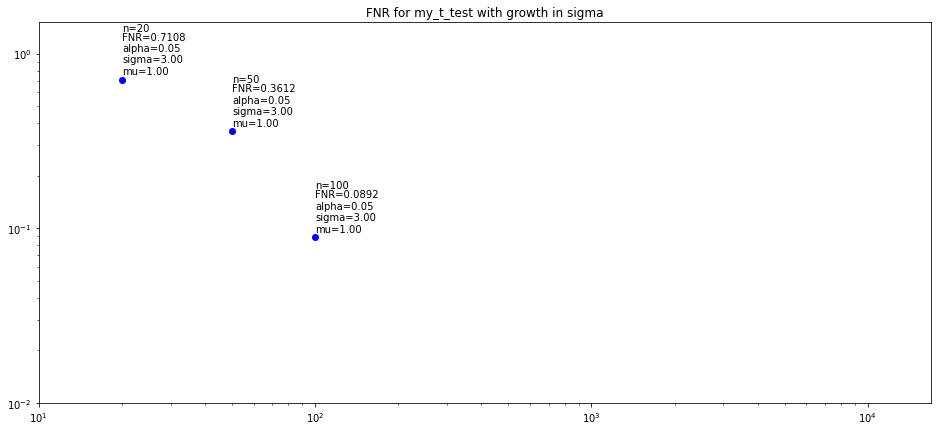

In [250]:
pyplot.figure(figsize=(16, 7))
pyplot.plot([fpns[i+20][1] for i in range(5)],[fpns[i+20][-1] for i in range(5)], 'bo', linewidth=1.0)
pyplot.yscale('log')
pyplot.xscale('log')

for i in range(5):
    if fpns[20+i][-1] > 0:
        pyplot.annotate(f'n={fpns[i+20][1]}',(fpns[i+20][1]*1.001, fpns[i+20][-1]*1.9))
        pyplot.annotate(f'FNR={fpns[i+20][-1]:.4f}', (fpns[i+20][1]*1.001 , fpns[i+20][-1]*1.68))
        pyplot.annotate(f'alpha={fpns[i+20][-2]:.2f}', (fpns[i+20][1]*1.001, fpns[i+20][-1]*1.45))
        pyplot.annotate(f'sigma={fpns[i+20][2]:.2f}', (fpns[i+20][1]*1.001, fpns[i+20][-1]*1.25))
        pyplot.annotate(f'mu={fpns[i+20][0]:.2f}', (fpns[i+20][1]*1.001, fpns[i+20][-1]*1.07))
    else:
        print(fpns_vis[20+i])
    
pyplot.xlim(left=10, right=17000)
pyplot.ylim(bottom=0.01, top=1.51)
pyplot.title('FNR for my_t_test with growth in sigma')
pyplot.show()

## Выводы
Весьма интересные получились результаты: при малых размерах выборки ошибка второго рода значительно выше, чем при больших при прочих равных. Ширина доверительного интервала также сужается при увеличении числа наблюдений. С ростом разницы между теоретическим и экспериментальными мат. ожиданиями, ошибка второго рода упала при всех значениях числа выборки, при больших n разница очень существенная. Уровень альфа влияет обратным образом на FNR, при понижении альфа, растет FNR. Среднеквадратическое отклонение при увеличении также повышает ошибку второго рода.



## Что доделать:
Добавить бейзланы, относительно чего смотреть в обоих случаях, для этого переписать fprs/fpns. 
Последнюю задачу оформить рассуждения о ненулевой дисперсии и затем рассмотреть различные случаи, либо выписать все в общем виде и оформить грамотно.

## Задача 4 (3 балла)

Пусть $\xi_1, ..., \xi_n \sim \mathrm{U}(0, \theta)$ (равномерное распределение от 0 до $\theta$).

Вывести теоретический доверительный интервал для $\theta$ с уровнем доверия
$1 - \alpha$ и доказать его корректность. Можно пользоваться любым определением доверительного интервала из рассказанных на ваше усмотрение.

## Решение
Перейдем к распределению $ \mathrm{U}(0, 1)$, поделив каждое из значений на $\theta$. По методу максимального правдоподобия, в качестве оценки теты возьмем $\hat{\theta} = X_{max}$, где $X_{max} = max(X_1, X_2, ... , X_n)$. Тогда найдём функцию распределения для  $X_{max}$:

$F_{X_{max}}=P(X_{max}\leq t)= P(X_1 \leq t, X_2 \leq t, ... ,X_n \leq t)$. А так как случайные величины независимы, то $P(X_1 \leq t, X_2 \leq t, ... ,X_n \leq t) = P(X_1 \leq t) P(X_2 \leq t)...P(X_n \leq t)=(F_{X_1}(x))^n$, получается функция распределения равна. 
\begin{equation*}
F_{X_1}(x) = 
 \begin{cases}
  1 , x \geq1, 
   \\
   x^n, x \in (0,1),
   \\
   x, x \leq 0.
 \end{cases}
\end{equation*}

Перейдем к расчету самого интервала, для этого посчитаем следующую величину: $P(q_\alpha\leq\frac{X_{max}}{\theta} < 1) = 1 - \alpha$. Тогда получается, $F(q_\alpha) = \alpha$ или $q_\alpha^n = \alpha \Leftrightarrow q_\alpha = \alpha^{\frac{1}{n}}$. Получается, что  $P( \alpha^{\frac{1}{n}} \leq\frac{X_{max}}{\theta} < 1) = 1 - \alpha$, тогда $\frac{X_{max}}{\alpha^{\frac{1}{n}}} \geq \theta  > X_{max}$ - Это и есть доверительный интервал для $\theta$.


## Задача 5 (3 балла)

Пусть есть равные группы A и B. По результатам теста выручка от одного пользователя в среднем в условиях A оценивается Стьдентом как 50 ± 3 руб, а в условиях B как 56 ± 4 руб. Аналитик, увидев такие результаты, говорит, что эффект составил 6 ± 7 руб, а значит результат AB-теста не стат. значим. Все ли корректно в этих рассуждениях? Любой ответ должен быть аргументирован. В случае, еcли в рассуждениях есть ошибка, то надо также посчитать корректно доверительный интервал.


## Решение
Нет, не все корректно. 

Доверительный интервал для каждого из случаев равен: $\mu \pm t_\alpha\sqrt{\frac{\sigma^2}{n}}$. Тогда для условий А: $\mu = 50$, а  $t_\alpha\sqrt{(\frac{\sigma_a^2}{n})}$ = 3, для В:  $\mu = 56$, а  $t_\alpha(\frac{\sigma_b^2}{n})$ = 4. Выразим $(\frac{\sigma^2}{n})$ для каждого из случаев: в А будет $\sqrt{(\frac{\sigma_a^2}{n})}$= $\frac{3}{t_\alpha}$, в В  $\sqrt{(\frac{\sigma_b^2}{n})} = \frac{4}{t_\alpha}$.

Рассмотрим теперь случайную $\xi ~ (\mu_1-\mu_2)$, тогда для нее доверительным интервалом будет $\Delta\mu \pm t_\alpha\sqrt{\frac{\sigma_a^2}{n}+\frac{\sigma_b^2}{n}}$. Подставим теперь выраженные ранее $\sqrt{(\frac{\sigma^2}{n})}$, возведя в квадрат предварительно, и получим, что:  $t_\alpha\sqrt{\frac{\sigma_a^2}{n}+\frac{\sigma_b^2}{n}} = t_\alpha\sqrt{\frac{9}{t_\alpha^2}+ \frac{16}{t_\alpha^2}}=5$. В свою очередь, $\Delta\mu = 56 - 50 = 6$. Тогда ответом является $6 \pm 5$. И получается, что доверительный интервал для заданного уровня альфа не накрывает 0 и следовательно, $H_0 : \mu_A - \mu_B = 0$ отвергается, и результат статистически значим.

## Задача 6* (3 балла)

На занятии мы увидели, почему большой размер выборки помогает точнее получить оценку для матожидания случайной величины. Используя аппарат математической статистики, покажите, какому товару стоит доверять больше. Возможно, вам придётся использовать допущения, но такова жизнь.

Согласны ли вы с автором поста? Есть ли дополнительные (не связанные с математикой) причины доверять правому товару больше чем левому?

![](https://i.redd.it/g5dt76g55sa71.jpg)

## Прошлое Решение
Построим доверительные интервалы для мат. ожидания в каждом из случаев. Однако, нам неизвестны сами значения выборки для второго товара. Рассмотрим самый критический случай, когда выборка состоит из только из значений 1 и 5 (в таком случае будет дисперсия максимальна), то есть необходимо решить следующую систему: 

x+y=2280 и x+5y = 4.6$*$2280. Тогда x=228, y=2052 и выборочный аналог дисперсии равен S = 1,44. Построим доверительный интервал: $\overline{x} \pm t_\alpha\sqrt{\frac{\sigma^2}{n}}$, уровень альфа возьмем 5%. Тогда $ 4.6 - 0.05 \leq \mu \leq 4.6 + 0.05 $. 

Аналогичный доверительный интервал для первого случая $ 5 \leq \mu \leq 5 $, так как дисперсия равна нулю. 

Получается, что согласно "голым" расчетам, первый товар может быть строго лучше второго. Однако, мы понимаем, что в первом случае число отзывов относительно мало, и накрутить их значительно проще, чем во втором. Более того, необходимо смотреть на локацию магазина и специфику товара, если это условная доставка канцелярии или чехлов для телефона, которые продают в центре Москвы, то такое распределение делает первый магазин подозрительнее, так как объемы очень малы. А также, стоит обратить внимание на длительность работы торговых точек, если у магазина за 5 лет только 19 отзывов на ходовой товар,то это сильно настораживает. 

## Решение после исправления
Построим доверительные интервалы по формуле: $\overline{x} \pm t_\alpha\sqrt{\frac{\sigma^2}{n}}$, уровень альфа возьмем 5%. Тогда исходя из имеющихся данных для второгоо случая он равен: $ 4.6 - 1.96\sqrt{\frac{\sigma^2}{2280}} \leq \mu \leq 4.6 + 1.96 \sqrt{\frac{\sigma^2}{2280}}$.

Для первого: $ 5 \leq \mu \leq 5 $, так как дисперсия равна нулю.

Получается, чтобы рейтинг второго магазина мог бы покрыть число 5, и был конкурентен(если судить только по указанному рейтингу) с первым, то не
обходимо, чтобы правая граница была $\geq 5$. Тогда решим неравенство: $4.6 + 1.96 \sqrt{\frac{\sigma^2}{2280}}\geq 5$. Из него получим, что $\sigma \geq \frac{20\sqrt{570}}{49}\approx 9.74$. Однако исходя из исходных условий задачи, рейтинг от конкретного индивида может принимать натуральные значения от 1 до 5 включительно.Таким образом, такое СКО невозможно($\sigma = \sqrt{\frac{1}{n-1}(x-\overline{x})^2}$, где X от 1 до 5 и X с чертой тоже), значит при заданных ограничениях невозможно реализовать такую выборку, чтобы она удовлетворяла условиям задачи и включала в доверительный интервал значение 5.

Получается, что согласно "голым" расчетам, первый товар может быть строго лучше второго. Однако, мы понимаем, что в первом случае число отзывов относительно мало, и накрутить их значительно проще, чем во втором. Более того, необходимо смотреть на локацию магазина и специфику товара, если это условная доставка канцелярии или чехлов для телефона, которые продают в центре Москвы, то такое распределение делает первый магазин подозрительнее, так как объемы очень малы. А также, стоит обратить внимание на длительность работы торговых точек, если у магазина за 5 лет только 19 отзывов на ходовой товар,то это сильно настораживает.